# 1_Banking_Loan_Division_Risk_of_Default_Analysis

<a id='back'><a/>
# Table of Contents
    
- [1. Bank Loan Division Risk of Default Analysis Overview](#1)
- [2. General Information Review](#2)
- [3. Data Preprocessing](#3)
    - [3.1 Dropping or Filling in Missing Values](#3.1)
    - [3.2 Changing Data Types](#3.2)
    - [3.3 Duplicates](#3.3)
    - [3.4 Conclusion](#3.4)
- [4. Data Categorization](#4)
- [5. Assessing Impact of Customer Circumstances to Risk of Default](#5)
    - [5.1 Relation between Having Children and Risk of Default](#5.1)   
    - [5.2 Relation between Marital Status and Risk of Default](#5.2)
    - [5.3 Relation between Income and Risk of Default](#5.3)
    - [5.4 Conclusion](#5.4)
- [6. General Conclusion](#6)

<a id='1'><a/>
# 1 Bank Loan Division Risk of Default Analysis Overview
[Return to Table of Contents](#back)

The bank's loan division has requested that we prepare a report on the impact of a customer's personal circumstances, such as number of children or marital status, on the likelihood of default. The loan division has provided some data on customers’ credit worthiness for our analysis. To complete this analysis we will complete the following:

<ul>
    <li>General Information Review</li>
    <li>Data Preprocessing</li>
    <li>Data Categorization</li>
</ul>
The results of our study will be used when building individual credit scores (a metric used to evaluate the ability of a potential borrower to repay a loan).

<a id='2'><a/>
# 2 General Information Overview
[Return to Table of Contents](#back)

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene
import seaborn as sns

In [2]:
# read all input data

try: 
    df= pd.read_csv('credit_scoring_eng.csv') # local path
except: 
    df= pd.read_csv('/datasets/credit_scoring_eng.csv') # server path

In [3]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [4]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 8.2 MB


In [6]:
for c in df.select_dtypes(include='object').columns:
    print(c)
    print(df[c].value_counts())

education
secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64
family_status
married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64
gender
F      14236
M       7288
XNA        1
Name: gender, dtype: int64
income_type
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        

In [7]:
df.duplicated().sum()

54

**General Information Key Points:**
<ul>
    <li>There are 21,525 rows, or customers, presented in the data </li>
    <li>There are 2 series with missing values: 'days_employed' and 'total_income'</li>
    <li>Several data types will need to be converted: 'children', 'days_employed', 'education', 'family status', 'gender', 'income_type' and 'purpose'</li>
    <li>There appear to be some data irregularities in select series. 'Children' has instances of -1 and 20 children, 'days_employed' has negative and some very large numbers and 'dob_years' has 0 as a minimum value  </li>
    <li>A number of series subcategories can be combined within 'purpose', 'income_type' and 'education'</li>
    <li>There are a small number of duplicates; they may de dropped</li>
    </ul>

<a id='3'><a/>
# 3 Data Preprocessing
[Return to Table of Contents](#back)

<a id='3.1'><a/>
## 3.1 Dropping or Filling in Missing Values
[Return to Table of Contents](#back)

In [8]:
# missing values as numbers

df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [9]:
# missing values as a percentage of the entire dataset

round(df.isnull().sum() / len(df),4)*100

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

The missing data makes up 10% of our dataset, which is not necessarily too large to delete, but we will see how we can fill them in.

In [10]:
# only the rows that are not misssing

df_total_income_not_null = df[df.total_income.notnull()]

In [11]:
# only the rows that are misssing

df_total_income_null = df[df.total_income.isnull()]

In [12]:
# test for columns to determine if missing data is random or not. 
# if the percentages for null and not null are similar, that means the missing data is random and these lines can be deleted
# test for both categorical and quantitative data

def compare_data_variance(column_name):
    print("total income null:")

    print(df_total_income_null[column_name].value_counts() / len(df_total_income_null))
    print("total income not null:")
    print(df_total_income_not_null[column_name].value_counts() / len(df_total_income_not_null))

In [13]:
compare_data_variance('income_type')

total income null:
employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64
total income not null:
employee                       0.517493
business                       0.236525
retiree                        0.177924
civil servant                  0.067800
unemployed                     0.000103
student                        0.000052
paternity / maternity leave    0.000052
entrepreneur                   0.000052
Name: income_type, dtype: float64


In [14]:
# test is for quantitative data only

def compare_data_mean(column_name):
    print("total income null:")

    print(df_total_income_null[column_name].mean())
    print("total income not null:")
    print(df_total_income_not_null[column_name].mean())

In [15]:
compare_data_mean('children')

total income null:
0.5524379024839007
total income not null:
0.5373882486693194


Based on our tests above, the missing data appears to be random, therefore we can attempt to fill them in.

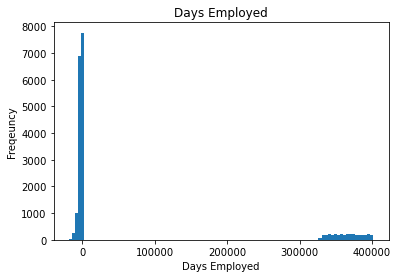

In [16]:
plt.hist(df.days_employed, bins=100);
plt.title('Days Employed')
plt.xlabel('Days Employed')
plt.ylabel('Freqeuncy')

plt.show()

The days employed over 300,000, of which there are relatively few, are far too large to be accurate. We should disregard this information. The numbers below 0, which make up the bulk of our data were likely made negative based on where the counting started. We will thus use the absolute value for these.

In [17]:
df['days_employed'] = np.where(df.days_employed>0, np.nan, df.days_employed.abs())
df.days_employed.fillna(df.days_employed.mean(),inplace=True)

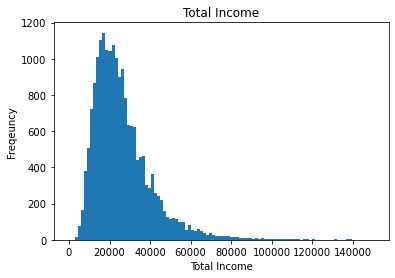

In [18]:
plt.hist(df.total_income, bins=100, range=[0,150000])
plt.title('Total Income')
plt.xlabel('Total Income')
plt.ylabel('Freqeuncy')

plt.show()

Total Income appears to have a distribution that is normal, but skewed to the lower end of the income bracket. We will thus use median, versus mode, to replace the missing values.

In [19]:
df['total_income'] = (df.groupby(['education', 'income_type', 'gender'])['total_income']
                      .apply(lambda x: x.fillna(x.median())))

In [20]:
# check to see all NAs were replaced

df[df['total_income'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,2353.015932,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,buy residential real estate


In [21]:
# dropping the one person above that did not have the 'total_income' missing value replaced

df = df.drop([5936])

In [22]:
# check to see all NAs were replaced

df[df['total_income'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [23]:
# how significant the '20' and '-1' children are in the whole data set.

number_of_children_grouped = df.groupby('children')['children'].count()
print(number_of_children_grouped)

children
-1        47
 0     14148
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64


In [24]:
# test to see how reliable -1 and 20 are by other metrics

df.groupby('children').mean()

,days_employed,dob_years,education_id,family_status_id,debt,total_income
children,,,,,,
-1,2402.345447,42.574468,0.829787,0.957447,0.021277,24638.697383
0,2442.256064,46.260602,0.831284,1.121007,0.075134,26093.948715
1,2191.380782,38.366127,0.786841,0.806144,0.092154,27084.420471
2,2153.663250,35.770316,0.788808,0.451095,0.094404,27196.152571
3,2198.541001,36.287879,0.824242,0.403030,0.081818,28862.641055
4,2213.691107,36.048780,0.780488,0.512195,0.097561,26620.051963
5,1534.644971,38.777778,1.222222,0.222222,0.000000,27008.605667
20,2189.784645,41.815789,0.842105,0.815789,0.105263,26733.319901


The number of rows with children of 20 and -1 is very small relative to our dataset, but as a best practice, we will drop them

In [25]:
df = df[(df.children != 20) & (df.children != -1)]

<a id='3.2'><a/>
## 3.2 Changing Data Types
[Return to Table of Contents](#back)

In [26]:
# the counts for the last four subcategories are so insignificant that they belong in an 'other' category

df['income_type'] = df['income_type'].replace(['unemployed', 'entrepreneur', 'paternity / maternity leave', 'student'],'other')

In [27]:
for c in ['education','family_status','gender','income_type','purpose']:
    df[c] = df[c].astype('category')

In [28]:
for c in ['total_income','children','days_employed']:
    df[c] = df[c].astype('int')

In [29]:
df.dtypes

children               int64
days_employed          int64
dob_years              int64
education           category
education_id           int64
family_status       category
family_status_id       int64
gender              category
income_type         category
debt                   int64
total_income           int64
purpose             category
dtype: object

<a id='3.3'><a/>
## 3.3 Duplicates
[Return to Table of Contents](#back)

In [30]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(21401, 12)
(21347, 12)


In [31]:
df.duplicated().sum()

0

<a id='3.4'><a/>
## 3.4 Conclusion
[Return to Table of Contents](#back)

The missing data in the column 'total_income' appears to be random given how close the percentages are (<2% variance) for the two variations (null and not null). However, given that the missing information makes up 10% of the total set, we cannot delete these lines. Thus the median based on similar groupings was used as a proxy for missing values in 'total_income'. We also replaced faulty information for days employed, even though that information is not required for this analysis. For the children listed as either 20 or -1, these rows were deleted entirely as they only made up 0.57% of the sample. Several data types were changed to reflect that they are categories as were other categories to correctly reflect that they are integers. Duplicates increased from filling in days employed and total income values with averages. All were dropped.

<a id='4'><a/>
# 4 Data Categorization
[Return to Table of Contents](#back)

In [32]:
# function to determine which subcategories need to be combined

def subcategory_relevancy_test(column_name):
    print(df[column_name].value_counts())

In [33]:
subcategory_relevancy_test('purpose')

wedding ceremony                            792
having a wedding                            768
to have a wedding                           764
real estate transactions                    672
buy commercial real estate                  659
buying property for renting out             650
housing transactions                        647
transactions with commercial real estate    645
housing                                     641
purchase of the house                       640
purchase of the house for my family         637
property                                    631
construction of own property                628
transactions with my real estate            623
building a real estate                      621
building a property                         619
purchase of my own house                    619
buy real estate                             616
housing renovation                          604
buy residential real estate                 601
buying my own car                       

After testing 'education', we decided to not combine the subcategories further as each represents a very different educational experience (even though for example 'graduate degree' only has 6 entries). 'Civil partnership' and 'married' is for our purposes the same and thus should be combined. 'Purpose' also needs to be consolidated.

In [34]:
df['family_status'] = df['family_status'].replace(['civil partnership'],'married')

In [35]:
def redefine_cats(x):
    if 'housing' in x or 'real estate' in x or 'property' in x or 'house' in x:
        new_purpose = 'housing'
    elif 'wedding' in x:
        new_purpose = 'wedding'
    elif 'car' in x:
        new_purpose = 'car'
    elif 'education' in x or 'university' in x or 'educated' in x:
        new_purpose = 'education'
    # the else was a catch-all that I kept running until I had gotten all the text into the above categories
    else:
        new_purpose = x
    return new_purpose

#df['purpose'].apply(redefine_cats).value_counts()
# the above was a test to make sure that all the different purpose statements were caught
df['purpose'] = df['purpose'].apply(redefine_cats)

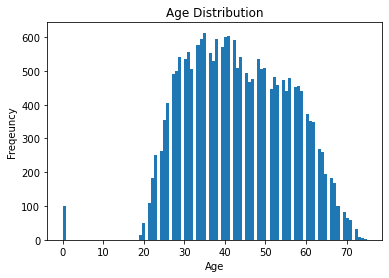

In [36]:
# check of the age distribution to determine how to bucket

plt.hist(df.dob_years, bins=100);
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Freqeuncy')

plt.show()

In [43]:
# how many age 0 outliers there are

df.query('dob_years < 1').shape

(100, 12)

In [44]:
#The function returns the age group according to the age value, using the following rules:
    # —'youth' for 15 <= age <= 24
    # —'adult' for 25 <= age <= 64
    # —'senior' for all other cases
    
def age_group(age):
    if 1 <= age <= 24:
        return 'youth'
    if 25 <= age <= 64:
        return 'adult'
    if 65 <= age <= 100:
        return 'senior'
    # this else test is the same as what I did previously for the loan category
    else:
        return 'error'

In [45]:
df['dob_years_categorized'] = df['dob_years'].apply(age_group)

In [46]:
# we must drop the zeros from our study

df_temporary2 = df[(df.dob_years != 0)]

# print(df_temporary2['dob_years'].value_counts())
# the above was a test to make sure that the 0s were deleted before reassigning
df = df_temporary2

In [47]:
df.agg({"total_income": [np.mean, np.median, np.max, np.min]})

,total_income
mean,26486.974491
median,23184.000000
amax,362496.000000
amin,3306.000000


In [48]:
#The function returns the income group according to the income value, using the following rules:
    # —'low' for income <= 25,000
    # —'lower middle' for income <= 60,000
    # —'upper middle' for income <= 100,000
    # —'high' for anything above 100,000
    
def income_group(income):
    if income <= 25000:
        return 'low'
    if 25001 <= income <= 60000:
        return 'lower middle'
    if 60001 <= income <= 100000:
        return 'upper middle'
    else:
        return 'high'

In [49]:
df['income_group_categorized'] = df['total_income'].apply(income_group)

**Categorizing Data Key Points:**
<ul>
    <li>Most significant category combining took place in series 'purpose' where it appears that answers were provided freely without any type of grouping. The loan purporses are now streamlined into just four categories: housing, wedding, car, education </li>
    <li>'Dob_years' was bucketed in age groups ages based on broad stages of life: youth, adult, senior. For example, comparing 35 dob vs 45 dob would have been too granular for our purposes.</li>
    <li>For 'total_income', buckets were created based on larger, institutionally established income categories

<a id='5'><a/>
# 5 Assessing Impact of Customer Circumstances to Risk of Default
[Return to Table of Contents](#back)

The Bank's Loan Division has requested that we perform a high-level analysis (without delving into statistical analysis of significance) of the impact of customer circumstances on risk of default. Specifically, we were asked to look at the impact of children, marital status and income.

<a id='5.1'><a/>
## 5.1 Relation between Having Children and Risk of Default
[Return to Table of Contents](#back)

In [50]:
# rate of default as a percentage

round(df.groupby('children')['debt'].mean(),4)*100

children
0    7.54
1    9.20
2    9.51
3    8.23
4    9.76
5    0.00
Name: debt, dtype: float64

There is not a clear linear correlation between a higher number of children and risk of default. However, we can see that those with 0 children seem to have a lower risk of default. Borrower's with 5 children should probably not be considered as there are only 8 borrowers with that many children in our sample size.

<a id='5.2'><a/>
## 5.2 Relation between Marital Status and Risk of Default
[Return to Table of Contents](#back)

In [51]:
# rate of default as a percentage

round(df.groupby('family_status')['debt'].mean(),4)*100

family_status
divorced           7.12
married            7.99
unmarried          9.78
widow / widower    6.55
Name: debt, dtype: float64

It seems that those who are unmarried are significantly more likely to default than the other categories. This makes sense as younger individuals with less financial stability are more likely to not be able to pay their loans. Widows / widdowers, who are likely older and financially secure and are the least likely to default

<a id='5.3'><a/>
## 5.3 Relation between Income and Risk of Default
[Return to Table of Contents](#back)

In [52]:
# rate of default as a percentage

round(df.groupby('income_group_categorized')['debt'].mean(),4)*100

income_group_categorized
high            6.06
low             8.38
lower middle    7.92
upper middle    5.60
Name: debt, dtype: float64

Customers in the upper middle and high income bracket are less likely to default than the other categories. This seems logical as they would be more financially secure than lower income levels.

<a id='6'><a/>
# 6 General Conclusion
[Return to Table of Contents](#back)

**Data Preprocessing**

This section on the analysis was focused on processing missing values and faulty data. The missing data in the column 'total_income' appeared to be random given how close the percentages are (<2% variance) for the two variations (null and not null). The median based on similar groupings was used as a proxy for missing values in 'total_income'. We also replaced faulty information for days employed, even though that information is not required for this analysis. For the children listed as either 20 or -1, these rows were deleted entirely as they only made up 0.57% of the sample. Separate to the work down to address missing values and bad data, several data types were changed to reflect that they are categories as were other types to correctly reflect that they are integers.

**Exploratory Data Analysis**

Most significant category combining took place in series 'purpose' where it appears that answers were provided freely without any type of grouping. The loan purporses are now streamlined into just four categories: housing, wedding, car, education. Dob_years' was bucketed in age groups ages based on broad stages of life: youth, adult, senior. For 'total_income', buckets were created based on larger, institutionally established income categories 

**Recommendations to the Loan Division as to Customer Credit Scoring**

Based on the limited analysis that we performed, we found correlations between a decreased likelihood of default and certain customer characteristics. Customers with 0 children were less likely to default, but if a customer had between 1 or 4 children, the risk did not increase linearly. Unmarried individuals are more likely to default while widowers are least likely. Married and divorced customers fall in the middle. Lastly, customers in the upper middle and high income brackets are less likely to default than customers in the low and lower middle income brackets.